# Potability Test of Water:  
#Problem Statement:- 
    Developing a model to predict the potability of water based on various parameter such as Ph Level, Hardness,Turbidity, And conductivity.

### IMPORTING LIBRARIES

In [524]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  
warnings.filterwarnings("ignore")

### IMPORTING DATA

In [525]:
#Read the file:
data = pd.read_csv(r"C:\Users\ADMIN\OneDrive\Desktop\Capstone Project -1\water_potability (2).csv")

In [526]:
data.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.54173     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity   Potability  
0       10.379783        86.990970   2.963135  not potable  
1       15.180013        56.329076   4.500656  not potable  
2       16.868637        66.420093   3.055934  not potable  
3       18.436525       100.341674   4.628771  not potable  
4       11.558279        31.997993   4.075075  not potable

In [527]:
data.shape #data contain 3276 rows and 10 columns

(3276, 10)

In [528]:
data.columns  #columns in the dataset.

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [529]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690300     6.127421   307.699498   
50%       7.036752   196.967627  20927.833605     7.130299   333.073546   
75%       8.062066   216.667456  27332.762125     8.114887   359.950170   
max      14.000000   323.124000  61227.196010    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  
count   3276.000000     3276.000000      3114.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786  
std       80.824064        3.308162        16.175008     0.780382  
min      181.483754        2.200000         0.738000     1.450000  
25%      365.734414       12.065801        55.844536     3.439711  
50%      421.884968       14.218338        66.622485     3.955028  
75%      481.792305       16.557652        77.337473     4.500320  
max      753.342620       28.300000       124.000000     6.739000

Based on the mean-median values of variable input variable seems to have very close to the Normal Distrubution.

In [530]:
data.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [531]:
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability          object
dtype: object

### DATA PREPROCESSING/CLEANING

In [532]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   object 
dtypes: float64(9), object(1)
memory usage: 256.1+ KB


#### CONVERTING CATEGORICAL COLUMN INTO NUMERIC FOR ANALYSIS

In [533]:
data.Potability.unique()

array(['not potable', 'potable'], dtype=object)

In [534]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [535]:
data.Potability = le.fit_transform(data.Potability)  

In [536]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int32  
dtypes: float64(9), int32(1)
memory usage: 243.3 KB


#### CHECKING MISSING VALUES

In [537]:
data.isnull().sum() #There are some missing value in Dataset .

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Column ph, Sulfate, Trihalomethanes Contains missing value.

#### TREATING MISSING VALUES BY FILLING MEAN IN NULL VALUES

In [917]:
data.ph.fillna(data.ph.mean(),inplace = True)
data.Sulfate.fillna(data.Sulfate.mean(),inplace = True)
data.Trihalomethanes.fillna(data.Trihalomethanes.mean(),inplace = True)

In [918]:
data.isnull().sum()#[data.isnull().sum()>0]

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

### CHECKING OUTLIERS

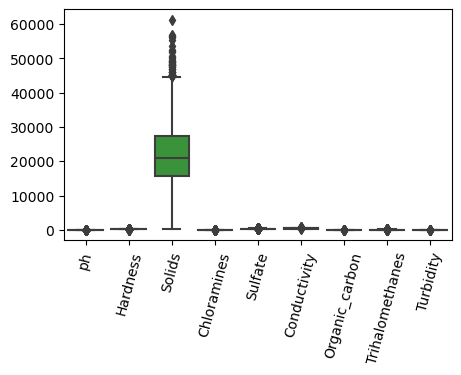

In [927]:
plt.figure(figsize = (5,3))
sns.boxplot(data=data)
plt.xticks(rotation = 75)
plt.show()

Based on the boxplot it appears that there may be outliers in the following parameters:
    Hardness,Chloramines,Sulphate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity.
But We can't remove outlier because they may be important to decide the quality of water.    

#### Treating Outliers by Winzorizing Technique

In [929]:
for i in data:
    if data[i].dtypes in ("float64","int64"):
        q1  = data[i].quantile(0.25)
        q3  = data[i].quantile(0.75)
        iqr = q3-q1
        ul  = q3 + 1.5*iqr
        ll  = q1 - 1.5*iqr
        data[i].clip(upper=ul,lower=ll,inplace=True)

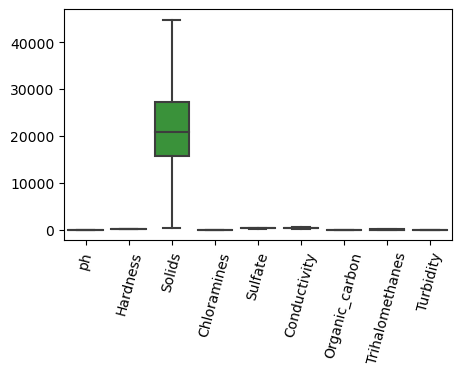

In [930]:
plt.figure(figsize = (5,3))
sns.boxplot(data=data)
plt.xticks(rotation = 75)
plt.show()

### Data Visualisation

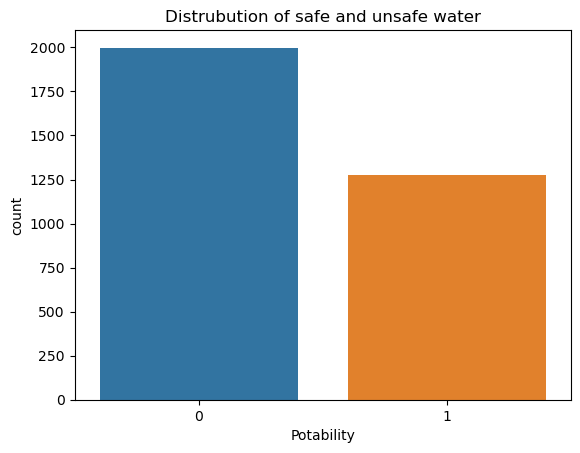

In [543]:
sns.countplot(x = 'Potability'  , data = data) 
plt.title("Distrubution of safe and unsafe water");

From above plot it shows that dataset is not balanced because sample of 0's(not Potable) is more than 1's(potable)

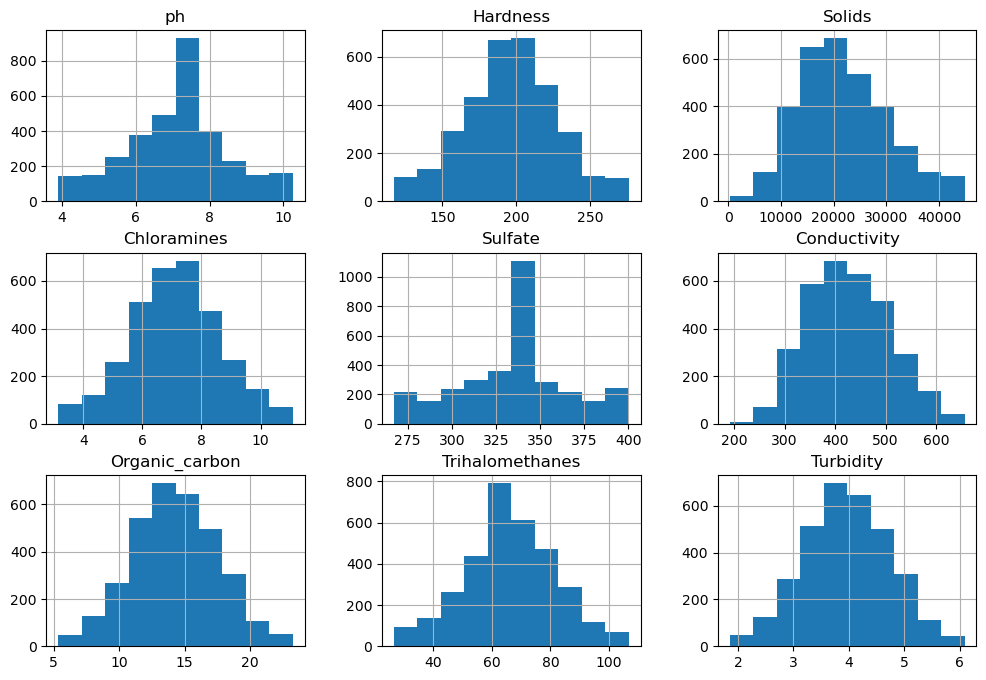

In [544]:
data.drop("Potability",axis=1).hist(figsize = (12 , 8));

From above histograms It shows that Data is very close to the Normal Distrubution.
 solids have slightly right skewed.

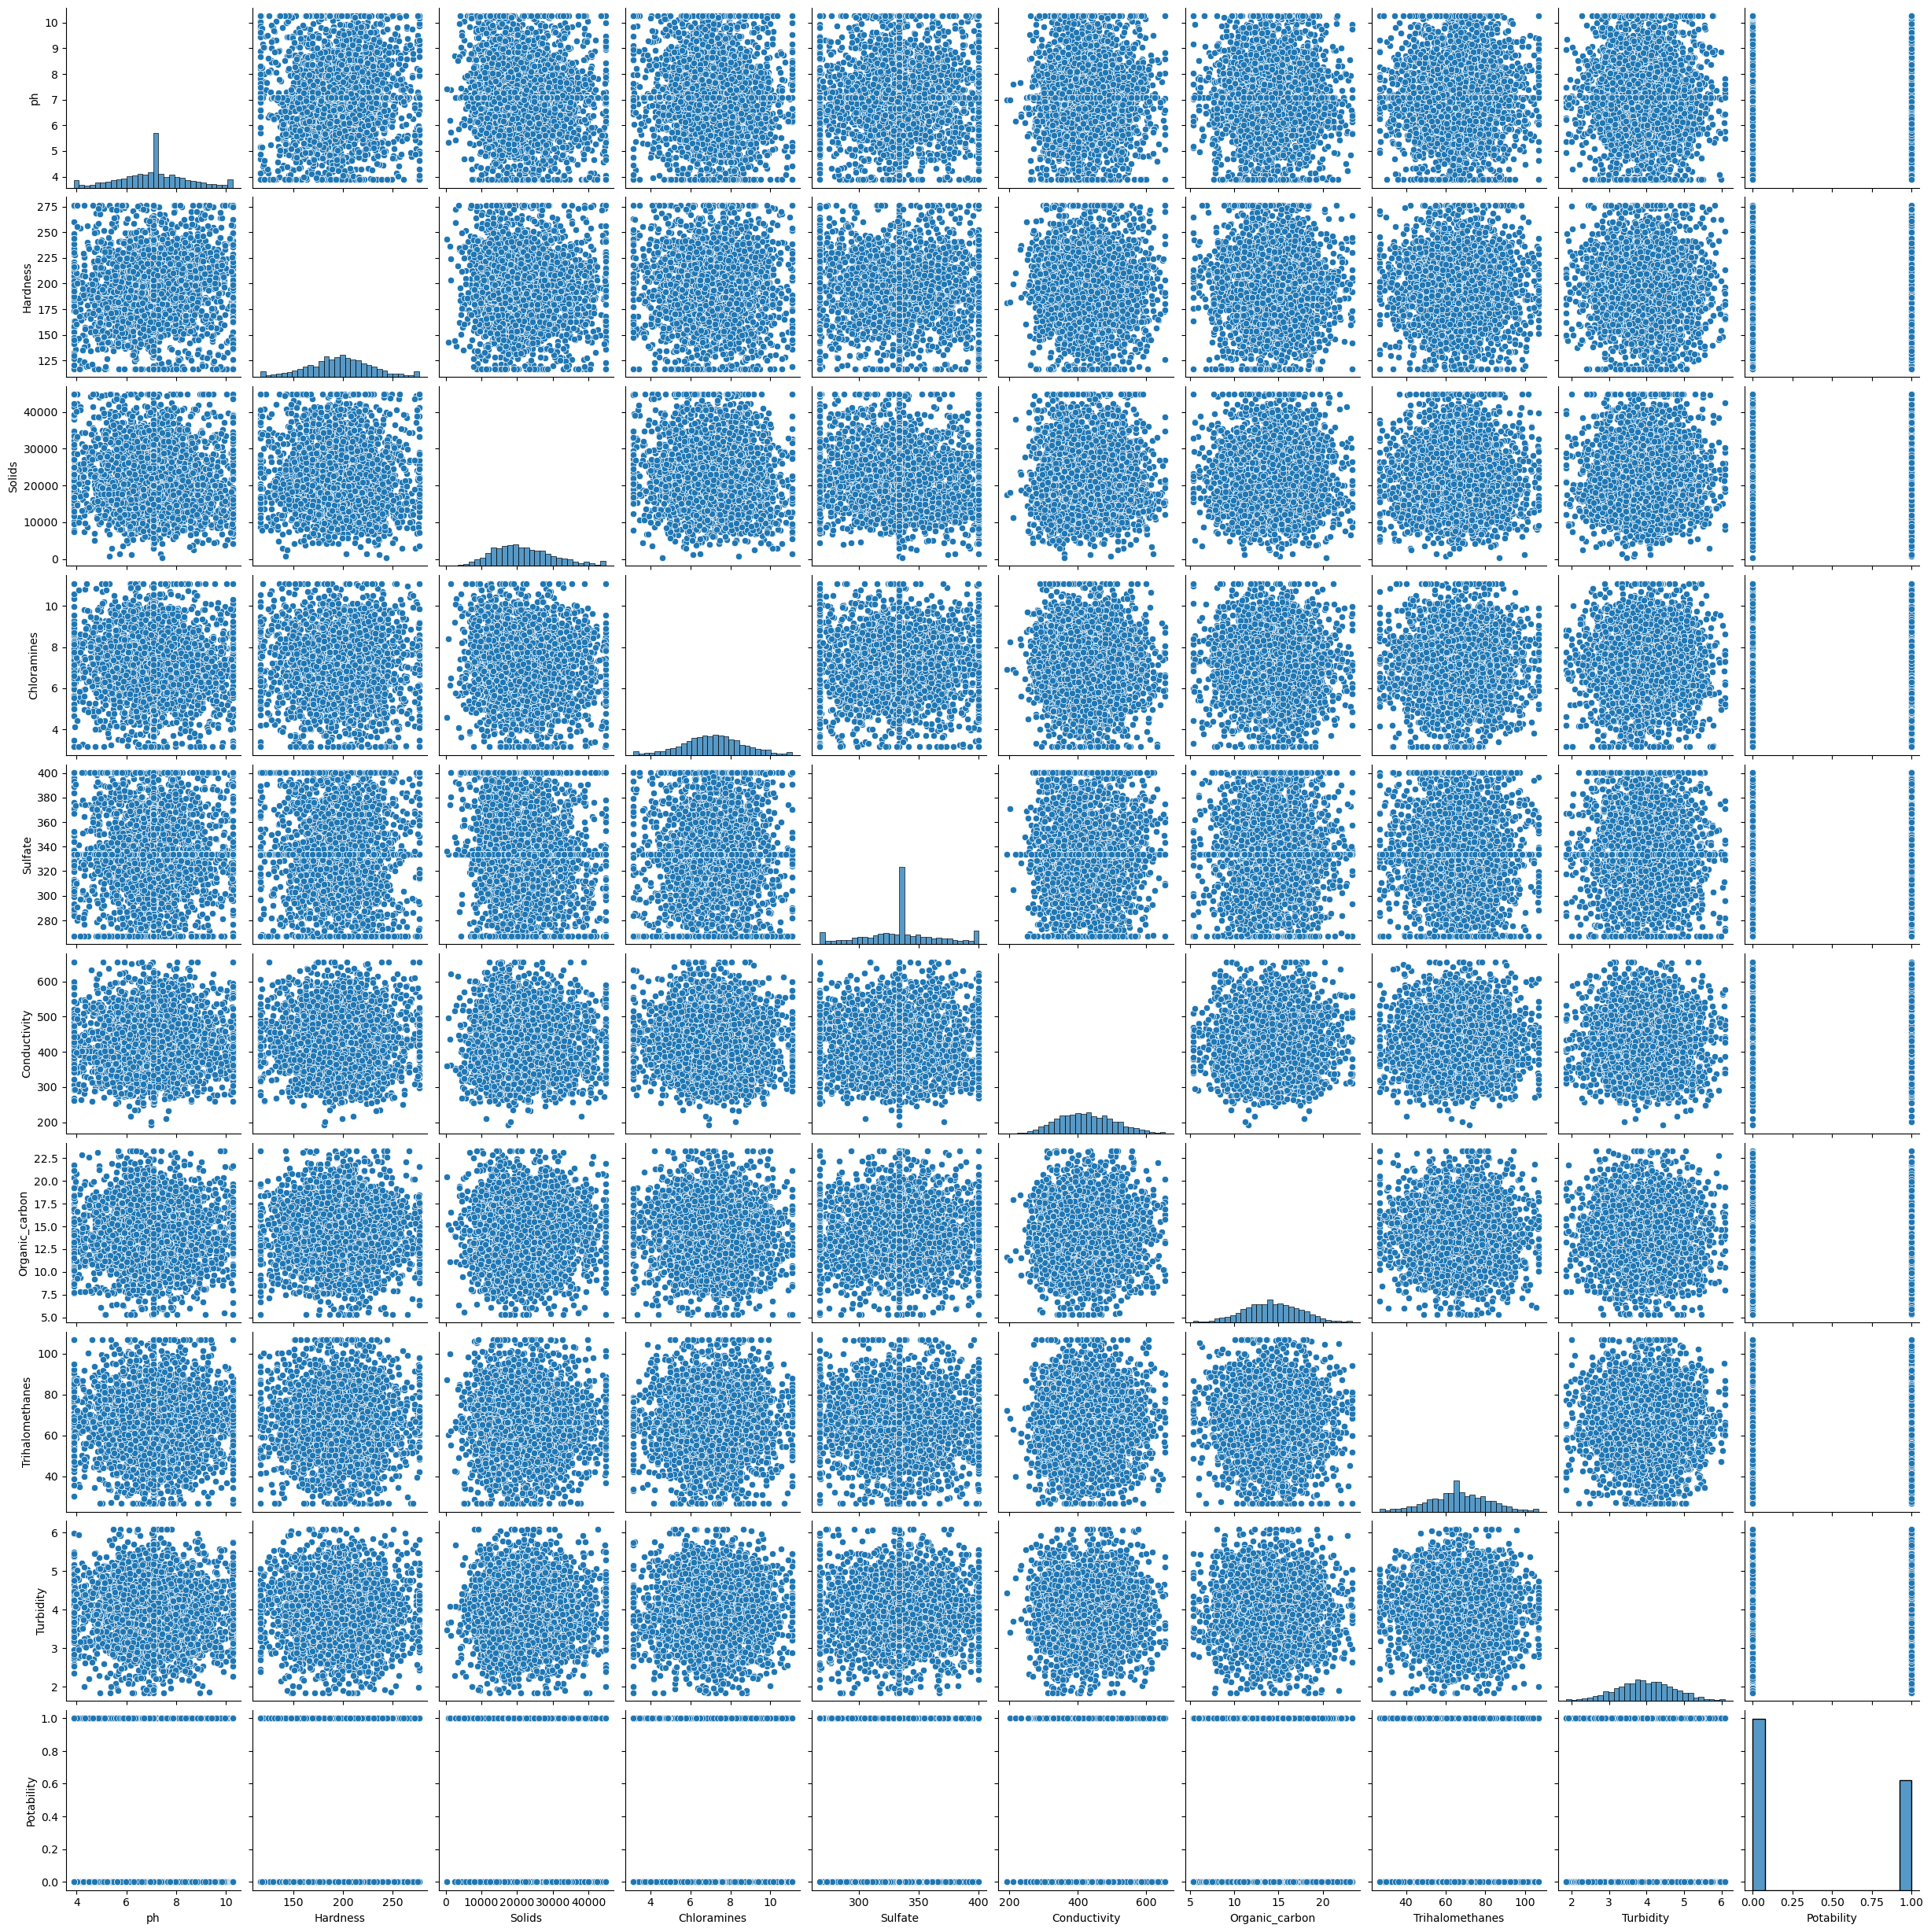

In [545]:
sns.pairplot(data);

Pairplot visualize relationship between each variable by creating scatterplot for each pair of 
variables and histograms along the diagonal.

Diagonal in pirplot also shows that Data is very close to the Normal Distrubution.
 solids have slightly right skewed.

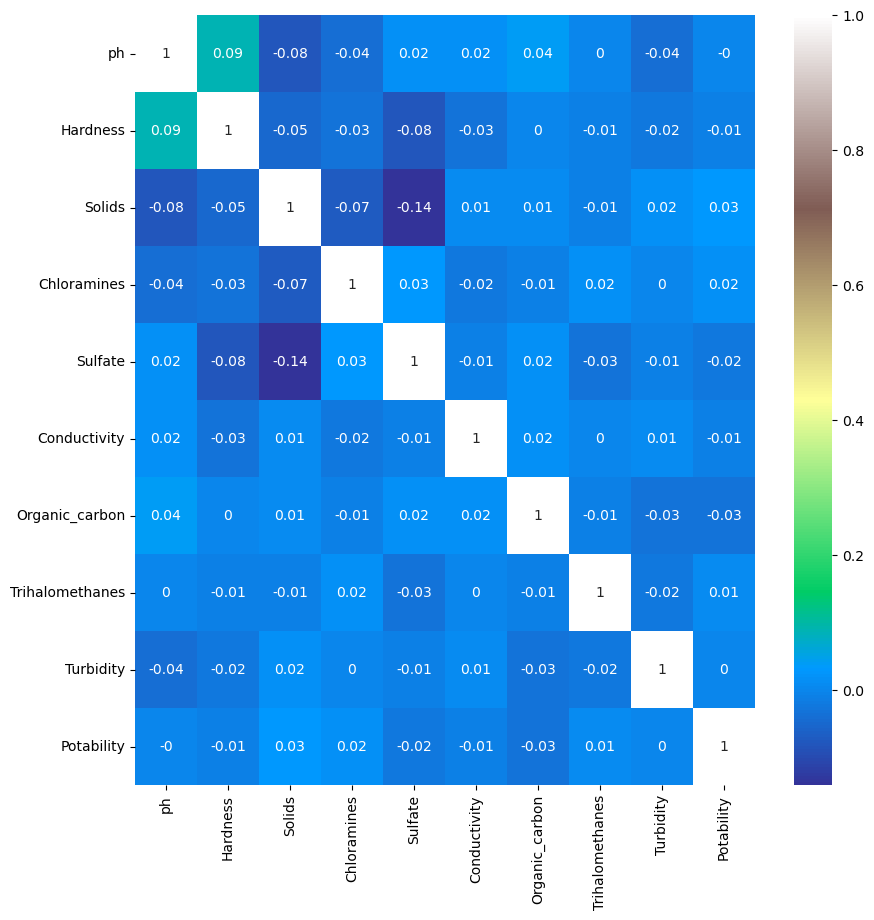

In [546]:
plt.figure(figsize = (10 , 10))
sns.heatmap(data.corr().round(2), annot = True , cmap = "terrain");

The matrix shows that there are strong positive correlations between some of the parameters, 
such as pH and hardness.
There are also strong negative correlations between some of the parameters, 
such as pH and sulfate.

In [547]:
df = pd.DataFrame()
df['Potability'] = data.Potability.value_counts()
df

Potability
Potability            
0                 1998
1                 1278

0 indicate not potable & 1 indicate potable

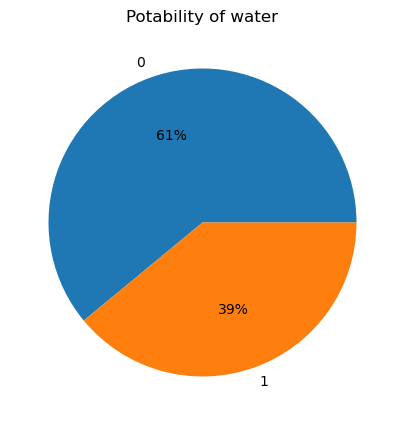

In [549]:
plt.figure(figsize = (5 , 5))
plt.pie(df.Potability , labels = df.index , autopct = '%1.0f%%')
plt.title("Potability of water");

Pie chart shows that 61% water is not potable and 39% water is potable.('0' indicates not Potable , '1' indicates Potable)

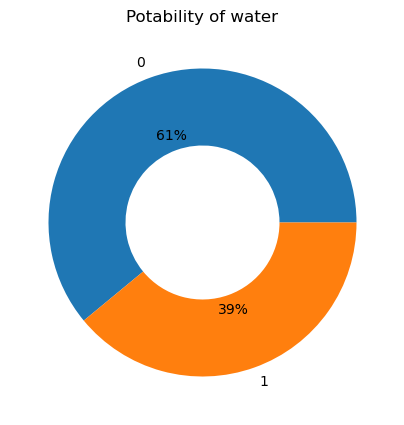

In [550]:
plt.figure(figsize = (5 , 5))
plt.pie(df.Potability , labels = df.index , autopct = '%1.0f%%', wedgeprops=dict(width =.5))
plt.title("Potability of water");

### SAMPLING: DIVIDING DATA INTO TRAIN AND TEST

In [551]:
from sklearn.model_selection import train_test_split
data_train , data_test = train_test_split(data , test_size = .2) #.2-->20%

In [552]:
data_train_x = data_train.iloc[:: , 0:9]
data_test_x  = data_test.iloc[:: , 0:9]
data_train_y = data_train.iloc[:: , -1]
data_test_y  = data_test.iloc[:: , -1]

In [553]:
data_train_x.head()

ph    Hardness       Solids  Chloramines     Sulfate  \
2933  7.080795  200.661925  29513.80486     7.966300  347.541419   
21    6.660212  168.283747  30944.36359     5.858769  310.930858   
144   4.965774  220.848639  21802.74490     6.250578  311.598136   
2358  6.164927  206.040584  22805.61150     4.398831  333.775777   
3117  5.274185  227.340186  17605.53576     6.326980  358.589903   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
2933    476.201585       19.950054        66.396293   3.027946  
21      523.671298       17.884235        77.042318   3.749701  
144     386.413332       18.035238        53.908177   3.421767  
2358    409.357679       16.895725        61.725876   4.169661  
3117    489.434591       11.199191        66.396293   4.364426

In [554]:
data_test_y.head()

666     1
2480    0
680     1
2188    0
3198    1
Name: Potability, dtype: int32

# MODEL BUILDING

### 1) LOGISTIC REGRESSION:

In [555]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [556]:
logreg.fit(data_train_x , data_train_y)

LogisticRegression()

In [557]:
pred_train = logreg.predict(data_train_x)
pred_test  = logreg.predict(data_test_x)

In [558]:
#pred_train

In [559]:
#pred_test

#### Prediction on train data

In [560]:
from sklearn.metrics import confusion_matrix

In [561]:
matrix = confusion_matrix(data_train_y , pred_train)
matrix

array([[1593,    0],
       [1027,    0]], dtype=int64)

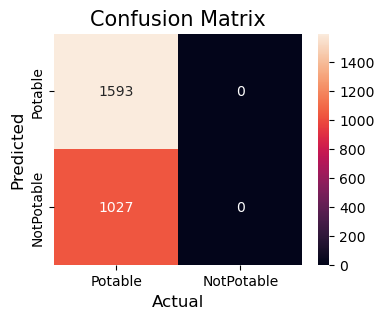

In [562]:
plt.figure(figsize = (4,3))
sns.heatmap(matrix , annot=True , fmt='g',
           xticklabels=['Potable' , 'NotPotable'],
           yticklabels=['Potable' , 'NotPotable'])
plt.xlabel('Actual',fontsize=12)
plt.ylabel('Predicted',fontsize=12)
plt.title('Confusion Matrix',fontsize=15)
plt.show()

In [563]:
from sklearn.metrics import accuracy_score 

In [564]:
LR_train_acc = accuracy_score(data_train_y , pred_train)
LR_train_acc

0.6080152671755725

#### Prediction on test data

In [565]:
matrix = confusion_matrix(data_test_y , pred_test)
matrix

array([[405,   0],
       [251,   0]], dtype=int64)

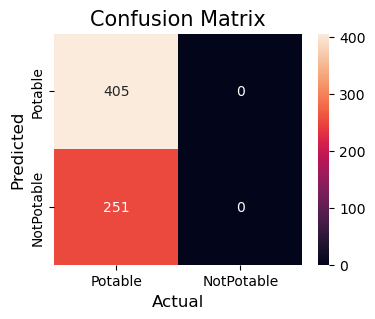

In [566]:
plt.figure(figsize = (4,3))
sns.heatmap(matrix , annot=True , fmt='g',
           xticklabels=['Potable' , 'NotPotable'],
           yticklabels=['Potable' , 'NotPotable'])
plt.xlabel('Actual',fontsize=12)
plt.ylabel('Predicted',fontsize=12)
plt.title('Confusion Matrix',fontsize=15)
plt.show()           

In [567]:
LR_test_acc = accuracy_score(data_test_y , pred_test)
LR_test_acc

0.6173780487804879

### DECESION TREE

In [568]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [569]:
dt.fit(data_train_x , data_train_y)

DecisionTreeClassifier()

In [570]:
predi_train = dt.predict(data_train_x)
predi_test = dt.predict(data_test_x)

#### Prediction on train data

In [571]:
from sklearn.metrics import confusion_matrix
matrix1 = confusion_matrix(data_train_y , predi_train)
matrix1

array([[1593,    0],
       [   0, 1027]], dtype=int64)

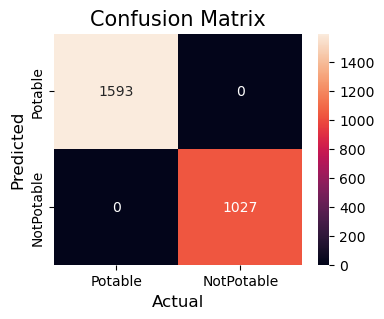

In [572]:
plt.figure(figsize = (4,3))
sns.heatmap(matrix1 , annot=True , fmt='g',
           xticklabels=['Potable' , 'NotPotable'],
           yticklabels=['Potable' , 'NotPotable'])
plt.xlabel('Actual',fontsize=12)
plt.ylabel("Predicted",fontsize=12)
plt.title('Confusion Matrix',fontsize=15)
plt.show() 

In [573]:
from sklearn.metrics import accuracy_score 

In [574]:
accuracy_score(data_train_y , predi_train)

1.0

Model gives 100% accuracy on train data. Model is overfitted.

#### Prediction on test data

In [575]:
matrix1 = confusion_matrix(data_test_y , predi_test)
matrix1

array([[261, 144],
       [138, 113]], dtype=int64)

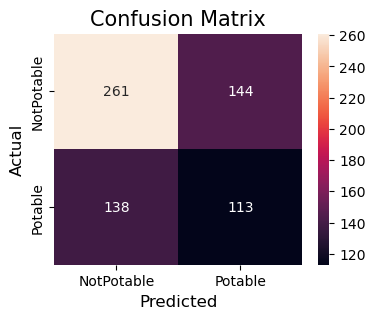

In [576]:
plt.figure(figsize = (4,3))
sns.heatmap(matrix1 , annot=True , fmt='g',
           xticklabels=['NotPotable' , 'Potable'],
           yticklabels=['NotPotable' , 'Potable'])
plt.ylabel("Actual",fontsize=12)
plt.xlabel("Predicted",fontsize=12)
plt.title('Confusion Matrix',fontsize=15)
plt.show() 

In [577]:
accuracy_score(data_test_y , predi_test)

0.5701219512195121

### HYPER PARAMETER

Hyper Prameter is the parameter which can user change.

#### max_depth Parameter:
It overcome the problem of overfitting ,control the branching of tree or depth of tree.

In [840]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = "entropy" , max_depth = 13)

In [841]:
dt.fit(data_train_x , data_train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=13)

In [842]:
pred_train_dt = dt.predict(data_train_x)
pred_test_dt = dt.predict(data_test_x)

In [843]:
DT_train_acc = accuracy_score(data_train_y , pred_train_dt)
DT_train_acc

0.8095419847328245

In [844]:
DT_test_acc = accuracy_score(data_test_y , pred_test_dt)
DT_test_acc

0.649390243902439

It gives good result arround 7.

#### min_sample_split Parameter:

In [835]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = "entropy" , min_samples_split = 40)

In [836]:
dt.fit(data_train_x , data_train_y)

DecisionTreeClassifier(criterion='entropy', min_samples_split=40)

In [837]:
pred_train_dt = dt.predict(data_train_x)
pred_test_dt = dt.predict(data_test_x)

In [838]:
accuracy_score(data_train_y , pred_train_dt)

0.8007633587786259

In [839]:
accuracy_score(data_test_y , pred_test_dt)

0.600609756097561

### TUNING BY GRID SEARCH

 It select the best combination of Hyper Parameter

In [307]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

search_dict = {"criterion" : ["gini" , "entropy"],
              "max_depth" : range(4 , 10), #branches
              "min_samples_split" : [50 , 74 , 100]} #parent

In [308]:
from sklearn.tree import DecisionTreeClassifier
grid = GridSearchCV(dt , param_grid = search_dict)

In [309]:
grid.fit(data_train_x , data_train_y)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy',
                                              min_samples_split=74),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 10),
                         'min_samples_split': [50, 74, 100]})

In [310]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 74}

### Cross-Validation

It detect the issues like overfitting.

In [185]:
from sklearn.model_selection import cross_val_score

In [186]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [197]:
score_dt = cross_val_score(dt, data_train_x , data_train_y , cv = 20)

In [198]:
score_dt

array([0.54198473, 0.57251908, 0.52671756, 0.58778626, 0.49618321,
       0.51908397, 0.52671756, 0.60305344, 0.5648855 , 0.54961832,
       0.54961832, 0.55725191, 0.53435115, 0.63358779, 0.64885496,
       0.55725191, 0.55725191, 0.57251908, 0.57251908, 0.50381679])

In [199]:
score_dt.max()

0.648854961832061

In [200]:
score_dt.min()

0.4961832061068702

In [201]:
score_dt.mean()

0.5587786259541985

### Important Feature

In [845]:
dt.feature_importances_  #higher the value more significant is the variable

array([0.15876132, 0.13170126, 0.12153667, 0.16133577, 0.1011324 ,
       0.07891321, 0.07536248, 0.07437292, 0.09688398])

In [846]:
dt.feature_importances_.sum()

1.0

In [847]:
len(dt.feature_importances_)

9

In [848]:
data_train_x.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [849]:
feat_imp = pd.DataFrame()
feat_imp['Features'] = data_train_x.columns
feat_imp['Important'] = dt.feature_importances_
feat_imp.sort_values('Important' , ascending = False)

Features  Important
3      Chloramines   0.161336
0               ph   0.158761
1         Hardness   0.131701
2           Solids   0.121537
4          Sulfate   0.101132
8        Turbidity   0.096884
5     Conductivity   0.078913
6   Organic_carbon   0.075362
7  Trihalomethanes   0.074373

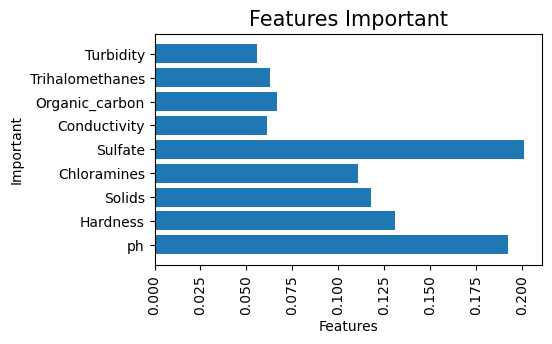

In [931]:
plt.figure(figsize = (5,3))
plt.barh(feat_imp['Features'] , feat_imp['Important'] )
plt.xticks(rotation = 90)
plt.xlabel('Features',size = 10)
plt.ylabel('Important',size = 10)
plt.title('Features Important',size = 15);

### RANDOM FOREST

In [851]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestClassifier(n_estimators=20, # make 20 trees
                               criterion="gini",
                               max_depth=8,  # each tree will have 4 branches
                               min_samples_split=25,# each tree will have parent node
                               min_samples_leaf=12,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number of tree we want  

Model.fit(data_train_x, data_train_y)

RandomForestClassifier(max_depth=8, min_samples_leaf=12, min_samples_split=25,
                       n_estimators=20)

In [852]:
pred_rf_train = Model.predict(data_train_x)
pred_rf_test  = Model.predict(data_test_x)

#### Prediction on train data

In [853]:
matrix_rf = confusion_matrix(data_train_y , pred_rf_train)
matrix_rf

array([[1545,   48],
       [ 685,  342]], dtype=int64)

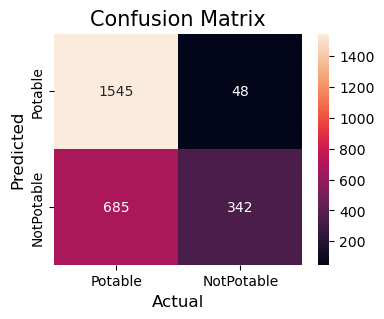

In [854]:
plt.figure(figsize = (4,3))
sns.heatmap(matrix_rf , annot=True , fmt='g',
           xticklabels=['Potable' , 'NotPotable'],
           yticklabels=['Potable' , 'NotPotable'])
plt.xlabel('Actual',fontsize=12)
plt.ylabel("Predicted",fontsize=12)
plt.title('Confusion Matrix',fontsize=15)
plt.show()

In [855]:
from sklearn.metrics import accuracy_score 

In [856]:
RF_train_acc = accuracy_score(data_train_y , pred_rf_train)
RF_train_acc

0.7202290076335878

#### Prediction on test data

In [857]:
matrix_rf = confusion_matrix(data_test_y , pred_rf_test)
matrix_rf

array([[374,  31],
       [203,  48]], dtype=int64)

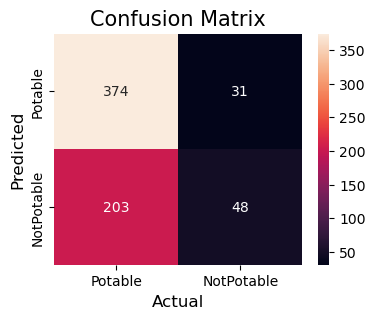

In [858]:
plt.figure(figsize = (4,3))
sns.heatmap(matrix_rf , annot=True , fmt='g',
           xticklabels=['Potable' , 'NotPotable'],
           yticklabels=['Potable' , 'NotPotable'])
plt.xlabel('Actual',fontsize=12)
plt.ylabel("Predicted",fontsize=12)
plt.title('Confusion Matrix',fontsize=15)
plt.show()

In [859]:
RF_test_acc = accuracy_score(data_test_y , pred_rf_test)
RF_test_acc

0.6432926829268293

### Feature_Importances

In [860]:
Model.feature_importances_

array([0.19274142, 0.13098395, 0.11797983, 0.11077727, 0.20095281,
       0.06136278, 0.06644318, 0.06274671, 0.05601206])

In [861]:
Model.feature_importances_.sum()

1.0

In [862]:
len(Model.feature_importances_)

9

In [863]:
data_train_x.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [864]:
feat_imp = pd.DataFrame()
feat_imp['Features'] = data_train_x.columns
feat_imp['Important'] = Model.feature_importances_
feat_imp.sort_values('Important' , ascending = False)

Features  Important
4          Sulfate   0.200953
0               ph   0.192741
1         Hardness   0.130984
2           Solids   0.117980
3      Chloramines   0.110777
6   Organic_carbon   0.066443
7  Trihalomethanes   0.062747
5     Conductivity   0.061363
8        Turbidity   0.056012

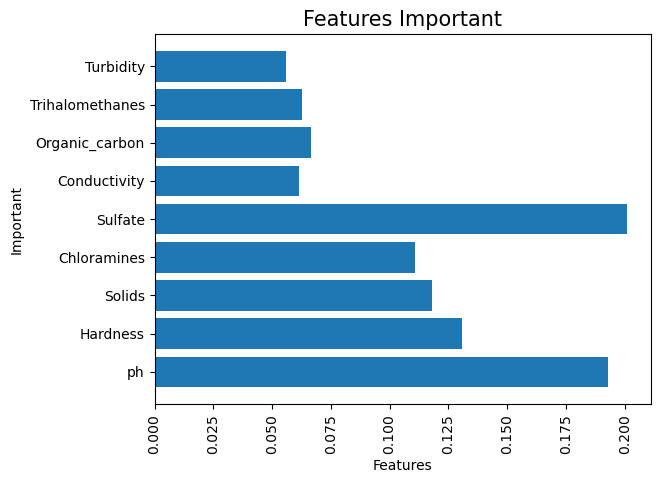

In [865]:
plt.barh(feat_imp['Features'] , feat_imp['Important'] )
plt.xticks(rotation = 90)
plt.xlabel('Features',size = 10)
plt.ylabel('Important',size = 10)
plt.title('Features Important',size = 15);

#### Model Building on Important Features

In [866]:
l1 = list(feat_imp.Features[0:9])
l1.append('Potability')

#### Read File:

In [867]:
data = pd.read_csv(r"C:\Users\ADMIN\OneDrive\Desktop\Capstone Project -1\water_potability (2).csv")
data.loc[: ,l1].head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.54173     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity   Potability  
0       10.379783        86.990970   2.963135  not potable  
1       15.180013        56.329076   4.500656  not potable  
2       16.868637        66.420093   3.055934  not potable  
3       18.436525       100.341674   4.628771  not potable  
4       11.558279        31.997993   4.075075  not potable

In [868]:
data1 = data.loc[: ,l1]
data1.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.54173     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity   Potability  
0       10.379783        86.990970   2.963135  not potable  
1       15.180013        56.329076   4.500656  not potable  
2       16.868637        66.420093   3.055934  not potable  
3       18.436525       100.341674   4.628771  not potable  
4       11.558279        31.997993   4.075075  not potable

#### Data Cleaning/ Preprocessing

In [869]:
data1.isnull().sum()[data1.isnull().sum() > 0]

ph                 491
Sulfate            781
Trihalomethanes    162
dtype: int64

In [870]:
data1.ph.fillna(data1.ph.mean(),inplace = True)
data1.Sulfate.fillna(data1.Sulfate.mean(),inplace = True)
data1.Trihalomethanes.fillna(data1.Trihalomethanes.mean(),inplace = True)

In [871]:
data1.isnull().sum()[data1.isnull().sum() > 0]

Series([], dtype: int64)

In [872]:
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability          object
dtype: object

In [873]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data1.Potability = le.fit_transform(data1.Potability)

In [874]:
data1.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int32
dtype: object

#### Sampling:

In [875]:
from sklearn.model_selection import train_test_split
data1_train , data1_test = train_test_split(data1 , test_size = .2)

In [876]:
data1_train_x = data1_train.iloc[:: , 0:9]
data1_test_x  = data1_test.iloc[:: , 0:9]
data1_train_y = data1_train.iloc[:: , -1]
data1_test_y  = data1_test.iloc[:: , -1]

#### Model Building:

In [877]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
rfc = RandomForestClassifier(n_estimators=20, # make 20 trees
                              criterion="gini",
                              max_depth=8,  # each tree will have 4 branches
                              min_samples_split=25,# each tree will have parent node                           min_samples_leaf=12,# each tree will have Child node
                              max_features="sqrt")# n_estimators means number of tree we want 

In [878]:
rfc.fit(data1_train_x , data1_train_y)

RandomForestClassifier(max_depth=8, min_samples_split=25, n_estimators=20)

In [879]:
pred_rf_test  = rfc.predict(data1_test_x)

In [880]:
matrix_rf = confusion_matrix(data1_test_y , pred_rf_test)
matrix_rf

array([[383,  27],
       [202,  44]], dtype=int64)

In [881]:
from sklearn.metrics import accuracy_score

In [883]:
rf_accuracy = accuracy_score(data1_test_y , pred_rf_test)
rf

0.6509146341463414

### SVM(Support Vector Machine)

In [884]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')

In [885]:
svc.fit(data_train_x , data_train_y)

SVC(kernel='linear')

In [886]:
pred_train = svc.predict(data_train_x)
pred_test = svc.predict(data_test_x)

#### Prediction on train data

In [887]:
from sklearn.metrics import confusion_matrix

In [888]:
matrix = confusion_matrix(data_train_y , pred_train)
matrix

array([[1569,   24],
       [1011,   16]], dtype=int64)

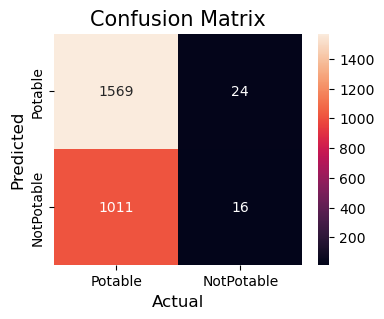

In [889]:
plt.figure(figsize = (4,3))
sns.heatmap(matrix , annot=True , fmt='g',
           xticklabels=['Potable' , 'NotPotable'],
           yticklabels=['Potable' , 'NotPotable'])
plt.xlabel('Actual',fontsize=12)
plt.ylabel("Predicted",fontsize=12)
plt.title('Confusion Matrix',fontsize=15)
plt.show()

In [890]:
from sklearn.metrics import accuracy_score 

In [891]:
SVM_train_acc = accuracy_score(data_train_y , pred_train)
SVM_train_acc

0.6049618320610687

#### Prediction on test data

In [892]:
matrix = confusion_matrix(data_test_y , pred_test)
matrix

array([[401,   4],
       [248,   3]], dtype=int64)

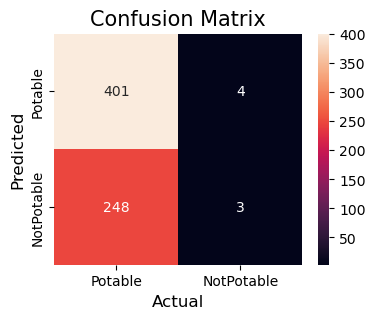

In [893]:
plt.figure(figsize = (4,3))
sns.heatmap(matrix , annot=True , fmt='g',
           xticklabels=['Potable' , 'NotPotable'],
           yticklabels=['Potable' , 'NotPotable'])
plt.xlabel('Actual',fontsize=12)
plt.ylabel("Predicted",fontsize=12)
plt.title('Confusion Matrix',fontsize=15)
plt.show()

In [894]:
from sklearn.metrics import accuracy_score 

In [895]:
SVM_test_acc = accuracy_score(data_test_y , pred_test)
SVM_test_acc

0.6158536585365854

### KNN(K-nearest neighbour)

In [896]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 54) #n_neighbors= no.of 'k'

In [897]:
knn.fit(data_train_x , data_train_y)

KNeighborsClassifier(n_neighbors=54)

#### Prediction on train data

In [898]:
pred_train = knn.predict(data_train_x)

In [899]:
matrix = confusion_matrix(data_train_y , pred_train)
matrix

array([[1523,   70],
       [ 948,   79]], dtype=int64)

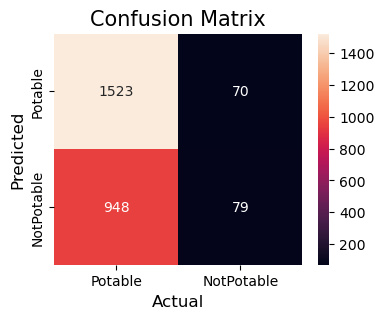

In [900]:
plt.figure(figsize = (4,3))
sns.heatmap(matrix , annot=True , fmt='g',
           xticklabels=['Potable' , 'NotPotable'],
           yticklabels=['Potable' , 'NotPotable'])
plt.xlabel('Actual',fontsize=12)
plt.ylabel("Predicted",fontsize=12)
plt.title('Confusion Matrix',fontsize=15)
plt.show()

In [901]:
from sklearn.metrics import accuracy_score 

In [902]:
KNN_train_acc = accuracy_score(data_train_y , pred_train)
KNN_train_acc

0.6114503816793894

#### Prediction on test data

In [903]:
pred_test = knn.predict(data_test_x)

In [904]:
matrix = confusion_matrix(data_test_y , pred_test)
matrix

array([[390,  15],
       [239,  12]], dtype=int64)

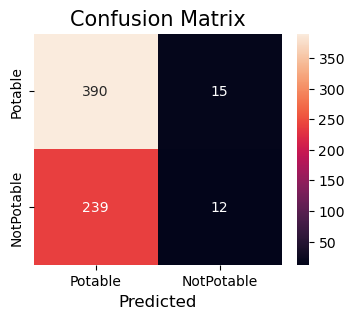

In [905]:
plt.figure(figsize = (4,3))
sns.heatmap(matrix , annot=True , fmt='g',
           xticklabels=['Potable' , 'NotPotable'],
           yticklabels=['Potable' , 'NotPotable'])
plt.xlabel('Actual',fontsize=12)
plt.xlabel("Predicted",fontsize=12)
plt.title('Confusion Matrix',fontsize=15)
plt.show()

In [906]:
from sklearn.metrics import accuracy_score

In [908]:
KNN_test_acc = accuracy_score(data_test_y , pred_test)
KNN_test_acc

0.6128048780487805

#### Conclusion:  We select Random Forest is a Best Model with High Acuuracy